# Breast Cancer Detection

In [1]:
# import required librabries
import numpy as np
import pandas as pd

In [2]:
# Load the wisconsin dataset
data = pd.read_csv('../Datasets/data_breast_cancer.csv')

data.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


## Cleaning the data

In [3]:
# Printing all the columns
data.columns[1:]

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
data.drop('Unnamed: 32', axis=1, inplace=True)

data.columns[1:]

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Encoding Categorical Values

In [5]:
#Using Label Encoders to replace values in a single column
from sklearn import preprocessing

labelEncoder = preprocessing.LabelEncoder()

In [6]:
data['diagnosis'] = labelEncoder.fit_transform(data['diagnosis'])

print(data['diagnosis'].head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32


## Plotting the initial data

In [7]:
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

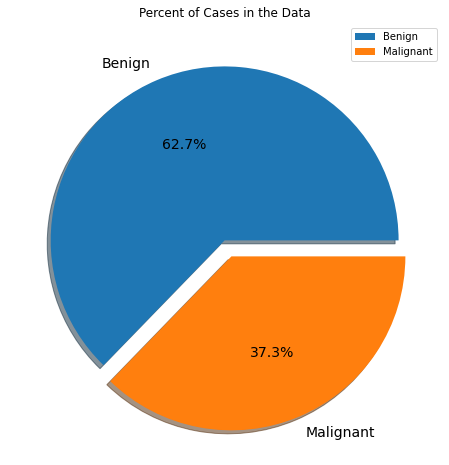

In [8]:
# Pie chart representation
pie_labels = ['Benign', 'Malignant']

#Number of benign and malignant cases
pie_y = data['diagnosis'].value_counts()

pie_explode = [0, 0.1]

plt.figure(figsize=(10, 8))
plt.pie(pie_y, labels=pie_labels, shadow=True,  autopct='%1.1f%%', explode=pie_explode, textprops={'fontsize': 14})
plt.legend()
plt.title("Percent of Cases in the Data")
plt.show()

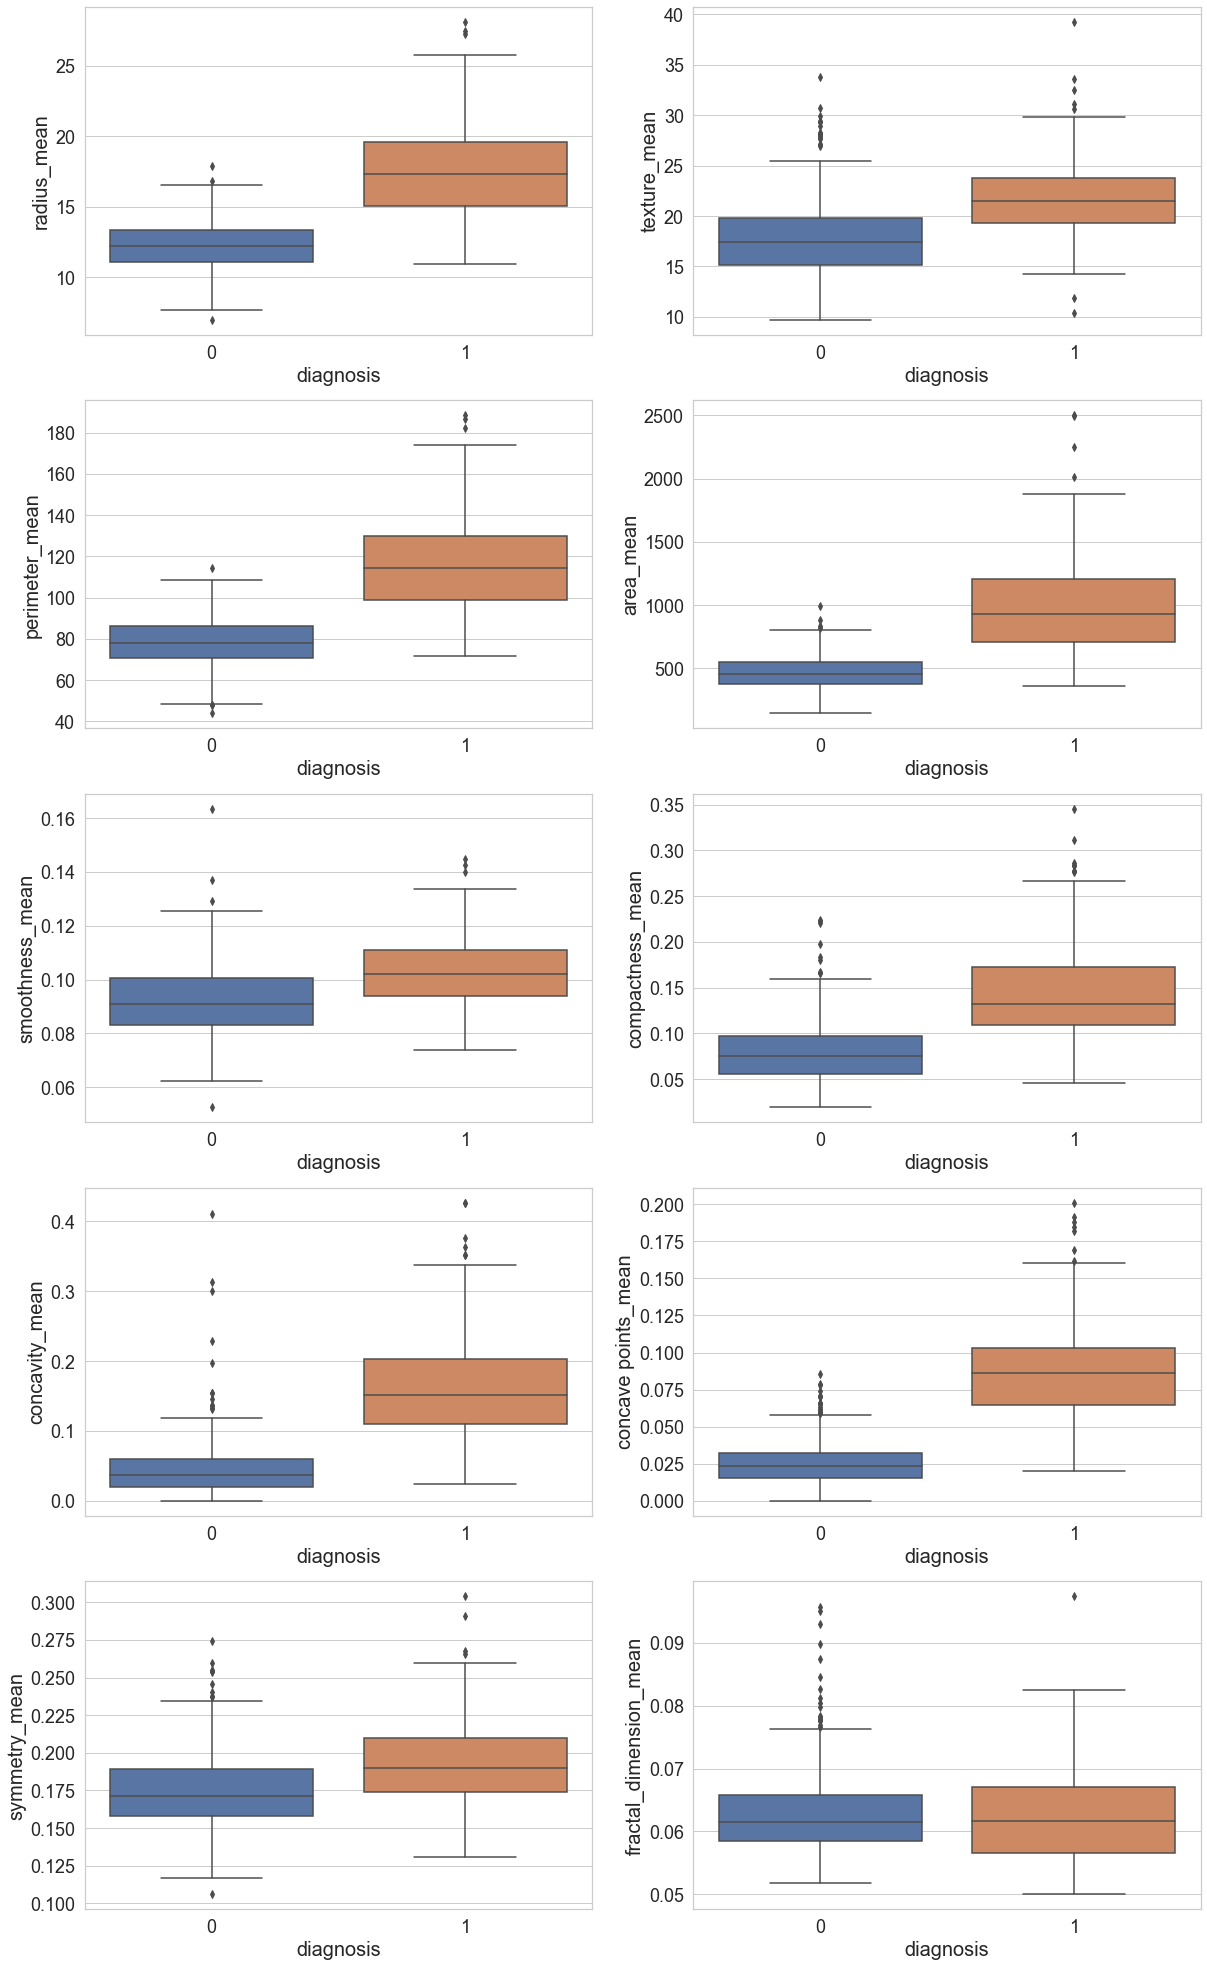

In [9]:
# Settings all columns on y axis and plotting them
%matplotlib inline
sns.set_theme(style="whitegrid")

x = data['diagnosis']

y = ['radius_mean', 'texture_mean', 'perimeter_mean',
     'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

fig, axes = plt.subplots(len(y)//2, 2, figsize=(20, 35))
axes_flat = axes.flatten()

index = 0
for para in y:
    axis = axes_flat[index]
    axis.xaxis.label.set_size(20)
    axis.yaxis.label.set_size(20)
    axis.tick_params(labelsize=18)
    
    sns.boxplot(x=x, y=data[para], data=data, ax=axis)
    index += 1
    
plt.show()

### Observations from Box plots

The classification of cancer depending on variation in each individual parameter has been shown with the help of boxplots. The following inferrences can be drawn by observing these graphs:-

- For each parameter (eg. radius_mean), more separated the two boxes are, the more significant role the parameter would play in deciding whether the cancer is benign or malignant. This is because, more the separation, more clear would be the signs of an abnormal behaviour by the cells.
- This implies that the "Fractal dimension" of the cell will have little to no impact in determining the outcome.
- Similarly, "Symmetry" of the cell is also not that influential for the result.
- The gap between the boxes (and in turn distribution of data) in "Smoothness" of the cell is not that significant. The upper limit of smoothness in benign cases almost overlaps with the median of the malignant ones. Thus this property of the cell should not be given a lot of weight (but cannot be neglected) in the detection, since there is a probability that it can classify average and below average smoothness cases as benign instead of malignant.
- Almost all the other properties of the cells show a clearer distinction in benign and malignant cases, indicating that they will probably have a stronger say in determination of the result.

Important: It must be noted that the above observations have be made by considering only the middle 50 percentile (i.e the box part) as it is just an human observation rather than a calculated judgement (Which would be too complicated for an initial observation and cannot be done with graphical observation).

In [10]:
#Separating result from input dataset
y = data['diagnosis']
data.drop(labels=['diagnosis'], axis=1, inplace=True)

data.head()
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int32


## More Preprocessing and Scaling

In [11]:
#Splitting the dataset 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=0)

print(X_train.shape)

(398, 31)


In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
#Getting a Scaled Dataframe
all_cols = data.columns
index = data.index

scaled_data = pd.DataFrame(X_train, columns=all_cols)

scaled_data.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,-0.232028,-0.749980,-1.099787,-0.741586,-0.701887,0.584593,-0.427726,-0.457550,-0.760550,-0.099860,...,-0.798483,-0.591967,-0.746602,-0.714529,0.116328,-0.341255,-0.046272,-0.623597,0.077542,0.450628
1,-0.232177,-1.028214,-0.139262,-1.029804,-0.894732,0.742882,-0.731843,-0.843301,-0.808805,-1.159759,...,-1.068703,-0.161981,-1.074343,-0.868941,0.382001,-0.970737,-0.954894,-0.761238,-1.071453,-0.295414
2,-0.170811,-0.538522,-0.299349,-0.568574,-0.550561,-0.714814,-0.731647,-0.639856,-0.668125,0.581758,...,-0.558512,-0.051227,-0.614110,-0.552748,-0.471637,-0.485919,-0.384602,-0.504704,0.349008,-0.133716
3,-0.232322,1.147577,-0.146430,1.061698,1.035628,-0.762301,-0.380637,-0.091016,0.221141,-0.663712,...,0.998276,0.134448,0.914190,0.863760,-0.397597,-0.057793,0.441794,0.638339,0.495789,-0.799466
4,-0.232412,-2.004538,-1.376954,-1.962370,-1.415904,1.476766,-0.557221,-1.137578,-1.263267,0.439011,...,-1.699888,-0.976348,-1.665615,-1.187480,1.126757,-0.867778,-1.391304,-1.756275,0.063338,0.563260


## Helper Funtion For Plotting

In [14]:
from sklearn.metrics import confusion_matrix

#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Helps to plot confusion matrix of different Models
def plot_confusion(prediction):
    confusion_labels = np.array([['True Neg.', 'False Pos.'], ['False Neg.', 'True Pos.']])
    
    cm = confusion_matrix(y_test, prediction)

    df_cm = pd.DataFrame(cm, range(2), range(2))

    plt.figure(figsize=(8,8))

    sns.set(font_scale=1.4) # for label size

    labels = (np.asarray(["{0}\n\n{1}".format(string, value)
                          for string, value in zip(confusion_labels.flatten(),
                                                   cm.flatten())])
             ).reshape(2,2)

    ax = sns.heatmap(df_cm, annot=labels, annot_kws={"size": 16}, fmt='', cbar=False) # font size
    
    
    # Confusion Matrix Labels
    ax.set_xticklabels(['Negative', 'Positive'])
    ax.set_yticklabels(['Negative', 'Positive'])

    plt.show()
    
    #Print Important Medical terms
    Specificity = (cm[0][0]) / (cm[0][0] + cm[0][1])
    print("\nSpecificity is: {0:.2f}%".format(Specificity*100))

    Sensitivity = (cm[1][1]) / (cm[1][1] + cm[1][0])
    print("\nSensitivity is: {0:.2f}%".format(Sensitivity*100))

## Model Selection

## Logistic Regression

In [15]:
# Use Logistic Selection Model for classification
from sklearn.linear_model import LogisticRegression

grid_values = {'penalty': ['l1','l2'], 'C': [0.001,0.01,0.1,1,10,100,1000]}
classifier_lr = GridSearchCV(
                cv=None,
                estimator=LogisticRegression(random_state = 0, penalty='l1', solver='liblinear'), 
                param_grid=grid_values)

classifier_lr.fit(X_train, y_train)
pred_lr = classifier_lr.predict(X_test)

#Printing the best hyperparameters
print('Best paramters for Logistic Regression: ', classifier_lr.best_params_)

Best paramters for Logistic Regression:  {'C': 0.1, 'penalty': 'l2'}


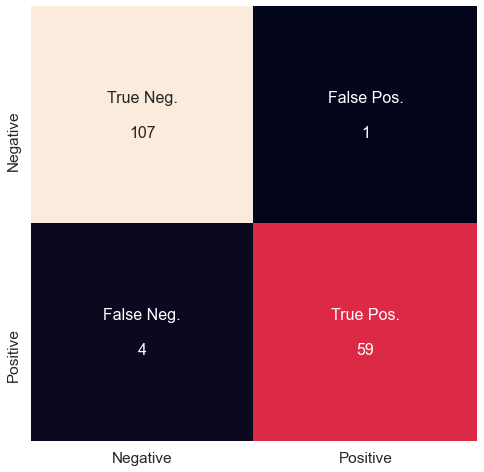


Specificity is: 99.07%

Sensitivity is: 93.65%


In [16]:
#Prediction of Logistic Regression
plot_confusion(pred_lr)

## K Nearest Neighbours

In [17]:
# Use KNeighbors Model for classification
from sklearn.neighbors import KNeighborsClassifier

grid_values = {'n_neighbors': [3, 5, 9, 11],
               'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan']
              }

classifier_knn = GridSearchCV(
                 KNeighborsClassifier(),
                 param_grid=grid_values
                )

classifier_knn.fit(X_train, y_train)
pred_knn = classifier_knn.predict(X_test)

#Printing the best hyperparameters
print('Best paramters for Logistic Regression: ', classifier_knn.best_params_)

Best paramters for Logistic Regression:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


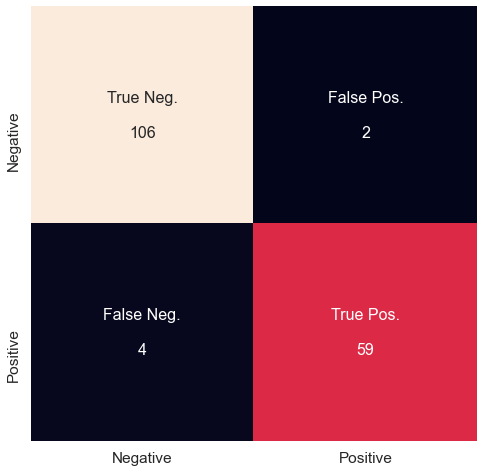


Specificity is: 98.15%

Sensitivity is: 93.65%


In [18]:
#Prediction of K nearest Neighbours
plot_confusion(pred_knn)

## Naive Bayes

In [19]:
#Using GaussianNB method to use Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

#No need for GridSearch as of now since GaussianNB does not accept parameters
classifier_nb = GaussianNB()

classifier_nb.fit(X_train, y_train)
pred_nb = classifier_nb.predict(X_test)

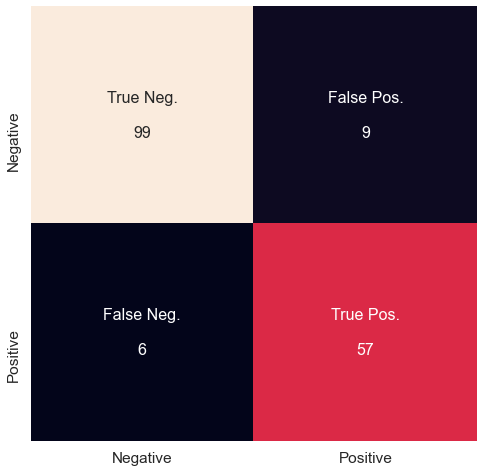


Specificity is: 91.67%

Sensitivity is: 90.48%


In [20]:
#Prediction of Naive Bayes
plot_confusion(pred_nb)

## Decision Tree

In [21]:
# Using Decision Tree Model for Classification
from sklearn.tree import DecisionTreeClassifier

grid_values = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15]}

classifier_dt = GridSearchCV(
                 DecisionTreeClassifier(),
                 grid_values)

classifier_dt.fit(X_train, y_train)
pred_dt = classifier_dt.predict(X_test)

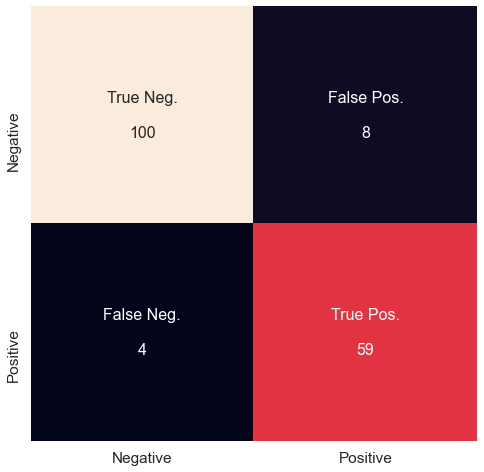


Specificity is: 92.59%

Sensitivity is: 93.65%


In [22]:
#Prediction of Decision Tree
plot_confusion(pred_dt)

## SVC

In [23]:
#Using Support Vector Machine for Classification
from sklearn.svm import SVC

grid_values = {'kernel': ['rbf', 'linear', 'poly'], 
               'C': [0.1, 1, 10, 100, 1000], 
               'gamma': [1, 0.1, 0.01, 0.001, 0.0001]}

classifier_svc = GridSearchCV(
                 SVC(),
                 grid_values)

classifier_svc.fit(X_train, y_train)
pred_svc = classifier_svc.predict(X_test)

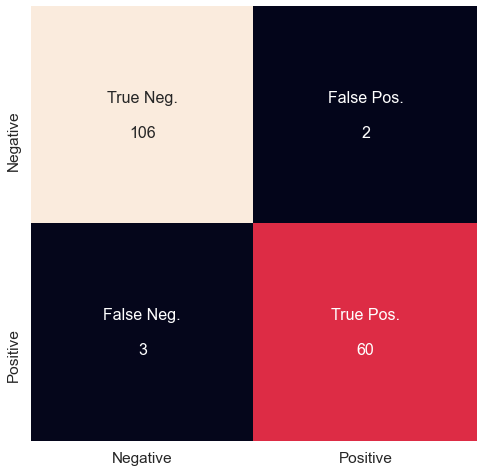


Specificity is: 98.15%

Sensitivity is: 95.24%


In [24]:
#Prediction of Support Vector
plot_confusion(pred_svc)

## Random Forest 

In [25]:
#Using Random Forest Model for Classification
from sklearn.ensemble import RandomForestClassifier

grid_values = {'bootstrap': [True], 
               'max_depth': [5, 10, None], 
               'max_features': ['auto', 'log2'], 
               'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

classifier_rf = GridSearchCV(
                 RandomForestClassifier(),
                 grid_values)

classifier_rf.fit(X_train, y_train)
pred_rf = classifier_rf.predict(X_test)

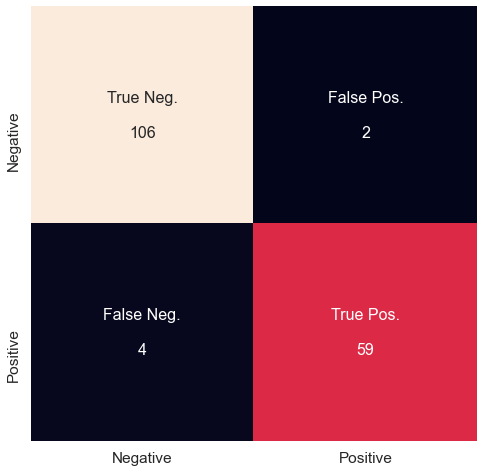


Specificity is: 98.15%

Sensitivity is: 93.65%


In [26]:
#Prediction of Random Forest
plot_confusion(pred_rf)

# Conclusion

It is clear and obvious that the Logistic Regression model is the most accurate for prediction of Breast Cancer w.r.t the dataset collected by Dr. William H. Wolberg, physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA.

- The final model has a commendable Specficity of 99.07%, implying that the model can correctly identify 99% of the people without Breast Cancer.
- The model also has a Sensitivity of 93.65%, implying that the model can correctly identify approximately 94% of the people with Breast Cancer.